In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-11-25,561704,185.0,744.0,1133.0,47.0,141.0,0.0,1.0,7434.0,1563.0,14.0,13,4135,3646.0,0.0,130.0,2230.0,2.0,1471.0,2856.0,86.0,0.0,12.0,0.0,169.0,0.0,1186.0,398.0,31100,0.0,1.0,4382.0,3.0,9.0,1.0,341.0,4889,98.0,0.0,...,1.0,0.0,2493.0,382,0.0,10222.0,459.0,0.0,3.0,14.0,5674.0,4221,74.0,5,39.0,0.0,6.0,0.0,18.0,13.0,1018.0,7381.0,0.0,241.0,12287.0,1310.0,11299,170293,14.0,107.0,192.0,0.0,0.0,355.0,4.0,0.0,0.0,7.0,12.0,90.0
331,2020-11-26,649666,200.0,644.0,1025.0,77.0,108.0,0.0,0.0,8593.0,1785.0,27.0,6,5896,3469.0,56.0,169.0,2156.0,1.0,1496.0,2632.0,88.0,58.0,0.0,0.0,129.0,0.0,1589.0,0.0,47898,0.0,1.0,3712.0,20.0,0.0,0.0,46.0,5022,126.0,1.0,...,0.0,0.0,3250.0,583,0.0,12289.0,502.0,0.0,5.0,25.0,6066.0,4862,90.0,2,37.0,0.0,16.0,0.0,17.0,15.0,1094.0,6814.0,0.0,484.0,13882.0,1297.0,18213,186589,0.0,118.0,188.0,0.0,0.0,319.0,5.0,1.0,0.0,10.0,69.0,110.0
332,2020-11-27,549900,0.0,656.0,1085.0,106.0,79.0,0.0,1.0,9043.0,1476.0,13.0,13,5447,3705.0,13.0,162.0,2292.0,3.0,1563.0,2111.0,92.0,0.0,2.0,3.0,114.0,0.0,924.0,0.0,37614,0.0,0.0,3568.0,0.0,4.0,0.0,107.0,5631,0.0,3.0,...,0.0,0.0,3069.0,569,37.0,10853.0,559.0,0.0,2.0,57.0,5464.0,4468,83.0,14,36.0,0.0,19.0,0.0,15.0,67.0,1168.0,6876.0,0.0,225.0,15331.0,1305.0,17555,106091,0.0,129.0,182.0,0.0,0

In [3]:

df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
330,329,492.0
331,330,794.0
332,331,908.0
333,332,1396.0


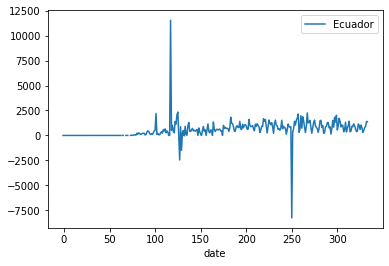

In [4]:
df.plot(x ='date', y='Ecuador')

### El modelo basado en probabilidad

In [5]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

670.0
709.6988847583643


In [6]:
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analisis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

191579


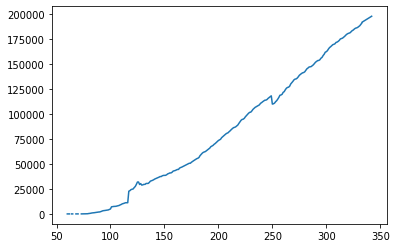

In [7]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

### Practica

1. Comparar el modelo de predicción matemático vs probabilidad

           4           3         2
1.357e-05 x - 0.01037 x + 3.666 x + 232.7 x - 3747


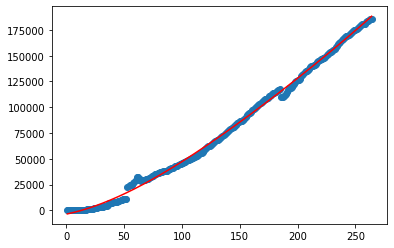

In [11]:
# MODELO POLINOMIAL
%matplotlib inline  
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp
url = 'https://raw.githubusercontent.com/DamianSumba/Simulacion_ups/master/owid-covid-data.csv'
df = pd.read_csv(url).fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float') # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1], dtype='float')

crx=x
cry=y
#Numero de Casos
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
y_pred=fun1(x)
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')  
plt.show()

In [12]:
# METODO PROBABILISTICO
media = ndf1.values[:,1].mean()
mediana = np.median(ndf1.values[:,1])
print("MEDIA: ",media)
print("MEDIANA: ",mediana)


MEDIA:  77970.03787878787
MEDIANA:  69949.5


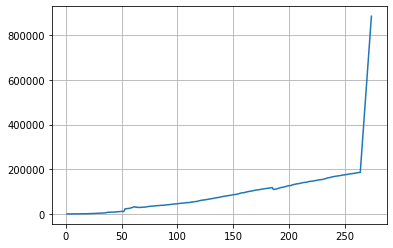

In [13]:
for it in range(int(x[-1]), int(x[-1]+10)):
    x=np.append(x,(it+1))
    y=np.append(y,y[-1] + mediana)
plt.plot(x,y)
plt.grid(True)
plt.show()

In [14]:
y_pred=np.array([])
y_pred=fun1(x)
print ('{3}{0:8}{3} {3}{1:12}{3} {3}{2:10}{3}'.format("-------","------------","----------","|"))
print ('{3}{0:8}{3} {3}{1:12}{3} {3}{2:10}{3}'.format("--Día--","Probalistico","Polinomial","|"))
print ('{3}{0:8}{3} {3}{1:12}{3} {3}{2:10}{3}'.format("-------","------------","----------","|"))
for i,j,k in zip(x,y,y_pred):
    print ('{3}{0:8}{3} {3}{1:12}{3} {3}{2:10}{3}'.format(i, j,round(k,2),"|"))
print ('{3}{0:8}{3} {3}{1:12}{3} {3}{2:10}{3}'.format("-------","------------","----------","|"))

|------- | |------------| |----------|
|--Día-- | |Probalistico| |Polinomial|
|------- | |------------| |----------|
|     1.0| |         1.0| |  -3510.56|
|     2.0| |         6.0| |  -3266.96|
|     3.0| |         7.0| |  -3016.15|
|     4.0| |        10.0| |  -2758.19|
|     5.0| |        13.0| |  -2493.15|
|     6.0| |        14.0| |  -2221.08|
|     7.0| |        15.0| |  -1942.05|
|     8.0| |        17.0| |  -1656.12|
|     9.0| |        23.0| |  -1363.34|
|    10.0| |        28.0| |  -1063.78|
|    11.0| |        37.0| |   -757.49|
|    12.0| |        58.0| |   -444.54|
|    13.0| |       111.0| |   -124.97|
|    14.0| |       168.0| |    201.14|
|    15.0| |       199.0| |    533.74|
|    16.0| |       426.0| |    872.78|
|    17.0| |       532.0| |    1218.2|
|    18.0| |       789.0| |   1569.94|
|    19.0| |       981.0| |   1927.94|
|    20.0| |      1082.0| |   2292.15|
|    21.0| |      1211.0| |   2662.51|
|    22.0| |      1403.0| |   3038.97|
|    23.0| |      1627.0|

### Retroceder un semana y comparar el modelo matemático vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

In [15]:
# Datos con una semana atrás
sem_x=np.arange(1,(len(ndf1)+1)-7,1, dtype='float')
sem_y=np.array(ndf1.values[:len(ndf1)-7,1], dtype='float')

print ('{4}{0:8}{4} {4}{1:8}{4} {4}{2:12}{4} {4}{3:10}{4}'.format("-------","--------","------------","----------","|"))
print ('{4}{0:8}{4} {4}{1:8}{4} {4}{2:12}{4} {4}{3:10}{4}'.format("--Día--","-Reales-","Probalistico","Polinomial","|"))
print ('{4}{0:8}{4} {4}{1:8}{4} {4}{2:12}{4} {4}{3:10}{4}'.format("-------","--------","------------","----------","|"))
for i,j,k in zip(sem_x,sem_y,y_pred):
    print ('{4}{0:8}{4} {4}{1:8}{4} {4}{2:12}{4} {4}{3:10}{4}'.format(i, j, j,round(k,2),"|"))
print ('{4}{0:8}{4} {4}{1:8}{4} {4}{2:12}{4} {4}{3:10}{4}'.format("-------","--------","------------","----------","|"))

|------- | |--------| |------------| |----------|
|--Día-- | |-Reales-| |Probalistico| |Polinomial|
|------- | |--------| |------------| |----------|
|     1.0| |     1.0| |         1.0| |  -3510.56|
|     2.0| |     6.0| |         6.0| |  -3266.96|
|     3.0| |     7.0| |         7.0| |  -3016.15|
|     4.0| |    10.0| |        10.0| |  -2758.19|
|     5.0| |    13.0| |        13.0| |  -2493.15|
|     6.0| |    14.0| |        14.0| |  -2221.08|
|     7.0| |    15.0| |        15.0| |  -1942.05|
|     8.0| |    17.0| |        17.0| |  -1656.12|
|     9.0| |    23.0| |        23.0| |  -1363.34|
|    10.0| |    28.0| |        28.0| |  -1063.78|
|    11.0| |    37.0| |        37.0| |   -757.49|
|    12.0| |    58.0| |        58.0| |   -444.54|
|    13.0| |   111.0| |       111.0| |   -124.97|
|    14.0| |   168.0| |       168.0| |    201.14|
|    15.0| |   199.0| |       199.0| |    533.74|
|    16.0| |   426.0| |       426.0| |    872.78|
|    17.0| |   532.0| |       532.0| |    1218.2|


### Correlación entre variables

La Correlación es una técnica estadística usada para determinar la relación entre dos o más variables.

La relación entre la duración de una carrera de distancia y el test del escalón, o la relación entre las características de la personalidad y la participación en deportes de alto riesgo.La correlación puede ser de al menos dos variables o de una variable dependiente y dos o más variables independientes, denominada correlación múltiple.

### Coeficiente de correlación

El Coeficiente de Correlación es un valor cuantitativo de la relación entre dos o más variables.

La coeficiente de correlación puede variar desde -1.00 hasta 1.00. La correlación de proporcionalidad directa o positiva se establece con los valores +1.00 y de proporcionalidad inversa o negativa, con -1.00. No existe relación entre las variables cuando el coeficiente es de 0.00.

$ r =\frac{N\sum{XY} -(\sum{X})(\sum{Y})}{\sqrt{N \sum{X^2}- (\sum{X})^2} * \sqrt{N \sum{Y^2}- (\sum{Y})^2}}$

In [16]:
xx=crx**2
yy=cry**2
xy=crx*cry
r=(len(crx)*sum(xy)-(sum(crx)*sum(cry)))/(sqrt(len(crx)*sum(xx)-(sum(crx)**2))*sqrt(len(crx)*sum(yy)-(sum(cry)**2)))
print("El coeficiente de correlación de los casos de Covid en Ecuador es: ",r)

El coeficiente de correlación de los casos de Covid en Ecuador es:  0.9928799061806505
